# Entrainement

4it [00:00, 35.26it/s]

Using GPU
Loading dataset


563it [00:25, 22.42it/s]


Size of data: 10752 (21.0 batches)
Params: batch_size=512, lr=0.0002, n_epochs=100, G_training_ratio=2
End of epoch 1/100; lossG=0.5549873113632202, lossD=1.4054296016693115
End of epoch 2/100; lossG=0.24735094606876373, lossD=0.5950597524642944
End of epoch 3/100; lossG=0.07113821804523468, lossD=0.18162183463573456
End of epoch 4/100; lossG=0.03248174488544464, lossD=0.08154813945293427
End of epoch 5/100; lossG=0.01887153647840023, lossD=0.04827985540032387
End of epoch 6/100; lossG=0.013176175765693188, lossD=0.0326562374830246
End of epoch 7/100; lossG=0.011081550270318985, lossD=0.027485396713018417
End of epoch 8/100; lossG=0.007917855866253376, lossD=0.020373176783323288
End of epoch 9/100; lossG=0.007336204871535301, lossD=0.017002347856760025
End of epoch 10/100; lossG=0.00592039106413722, lossD=0.014420595951378345
End of epoch 11/100; lossG=0.005091302562505007, lossD=0.012446850538253784
End of epoch 12/100; lossG=0.005295661743730307, lossD=0.01467081531882286
End of epoc

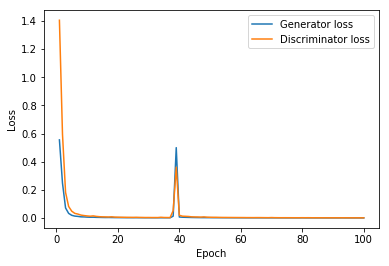

In [17]:
%run main

# Essais

In [18]:
import reencodings

import music21 as m21

from encoder import file_to_dictionary, dictionary_to_midi, NUMBER_OF_PITCHES
from tonality import *

In [27]:
fixed_noise = gpu(torch.randn(batch_size, netG.z_dim))
gen_output = netG(fixed_noise).cpu().detach().numpy()

In [28]:
threshold = 0.975 #À régler

res = []
s = 0
c = 0
for bar in gen_output:
    res.append((bar[0]>=threshold).T)
    c += 1
    s += np.sum(bar[0]>=threshold)
dico = {"Voice 1":res[:30]}

print("Indication de la complexité:",s/c)

Indication de la complexité: 33.4453125


In [29]:
score_rec = dictionary_to_midi(dico)
score_rec.show('midi')